# Quantum Circuit Visualization

This notebook is used for visualizing the quantum circuits defined in the QuantumRNN model. It includes code for rendering the circuit diagrams and analyzing the quantum operations.

In [5]:
from qiskit import QuantumCircuit

def qrnn_circuit(n_qubits, n_layers, weights, inputs):
    """Create a quantum circuit for the QuantumRNN model."""
    qc = QuantumCircuit(n_qubits)
    
    # Encode input data as angles of rotation gates
    for i in range(min(n_qubits, len(inputs))):
        qc.rx(inputs[i], i)  # Use RX gates to encode the input data
    
    # Apply trainable variational layers
    for l in range(n_layers):
        # Rotation gates with trainable parameters
        for i in range(n_qubits):
            qc.rx(weights[l][i][0], i)
            qc.rz(weights[l][i][1], i)
            qc.rx(weights[l][i][2], i)
        
        # Entanglement
        for i in range(n_qubits - 1):
            qc.cx(i, i + 1)
        
        # Connect last qubit to first qubit to create a cyclic entanglement
        qc.cx(n_qubits - 1, 0)
        
        # Additional rotation gates with trainable parameters
        for i in range(n_qubits):
            qc.rz(weights[l][i][3], i)
    
    # Add measurements
    qc.measure_all()
    
    return qc

## Analyzing Quantum Operations

In this section, we will analyze the quantum operations performed by the circuit and visualize the state vector.

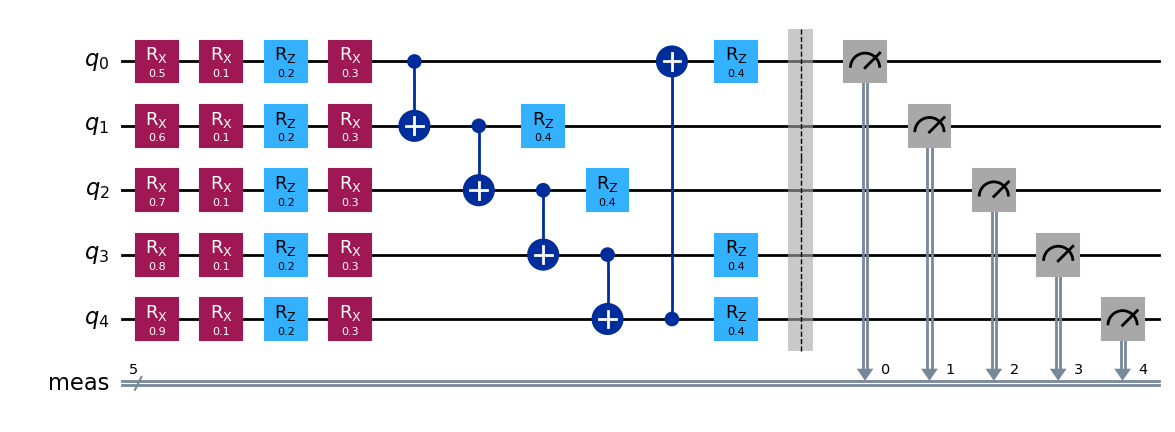

In [6]:
n_qubits = 5
n_layers = 1
weights = [[[0.1, 0.2, 0.3, 0.4] for _ in range(n_qubits)] for _ in range(n_layers)]
inputs = [0.5, 0.6, 0.7, 0.8, 0.9]  # Example inputs

# Create the quantum circuit
qc = qrnn_circuit(n_qubits, n_layers, weights, inputs)

# Visualize the quantum circuit
qc.draw('mpl')

In [9]:
from qiskit_aer import AerSimulator
from qiskit import transpile

def simulate_circuit(qc):
    """Simulate the quantum circuit using AerSimulator."""
    # Initialize the simulator
    simulator = AerSimulator()
    
    # Transpile the circuit for the simulator
    transpiled_qc = transpile(qc, simulator)
    
    # Run the simulation
    result = simulator.run(transpiled_qc).result()
    
    # Get the counts (measurement results)
    counts = result.get_counts()
    
    return counts

# Example usage
n_qubits = 5
n_layers = 1
weights = [[[0.1, 0.2, 0.3, 0.4] for _ in range(n_qubits)] for _ in range(n_layers)]
inputs = [0.5, 0.6, 0.7, 0.8, 0.9]  # Example inputs

# Create the quantum circuit
qc = qrnn_circuit(n_qubits, n_layers, weights, inputs)

# Simulate the circuit
counts = simulate_circuit(qc)
print("Measurement results:", counts)

Measurement results: {'10010': 6, '01001': 4, '01011': 4, '10100': 2, '00111': 17, '11010': 11, '00001': 10, '10011': 18, '01110': 24, '00010': 19, '01101': 4, '10111': 23, '11100': 6, '01010': 8, '00101': 3, '10101': 15, '01111': 29, '11110': 41, '10001': 117, '01000': 60, '00100': 38, '01100': 45, '11011': 12, '11000': 6, '00110': 27, '11101': 73, '10000': 11, '11001': 98, '10110': 11, '11111': 50, '00000': 220, '00011': 12}
